## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#import the dataset
df=pd.read_csv('ab_data.csv')
#show the first 5 rows

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#show the total number of rows and columns 

df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
#the number of unique user_id 

df['user_id'].nunique()


290584

d. The proportion of users converted.

In [5]:
#calculate the converted users
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#thenumber of time new_page and treatment don't line up

x=df.query('group=="treatment"&landing_page!="new_page"')
v=df.query('group!="treatment"&landing_page=="new_page"')
len(x)+len(v)

3893

f. Do any of the rows have missing values?

In [7]:
#view if there is any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#remove the mismatch rows
w=df.query('group=="treatment"&landing_page!="new_page"')          
df2=df.drop(w.index)


In [9]:
#remove the mismatch rows
c=df2.query('group=="control"&landing_page!="old_page"')
df2=df2.drop(c.index)


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
#the number of unique user_id 

df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#find out the duplicate user_id
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2['user_id'].duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop_duplicates(subset=['user_id'])
sum(df2.duplicated())

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
#the averga of the converted column 

df2['converted'].mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
#view the probability of the converted rate for both control
control_converted=df2.query('group=="control"&converted==1')
control=df2.query('group=="control"')
control_converted.shape[0]/control.shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
treatment_converted=df2.query('group=="treatment"&converted==1')
treatment=df2.query('group=="treatment"')
treatment_converted.shape[0]/treatment.shape[0]

0.11880724790277405

d. What is the probability that an individual received the new page?

In [18]:
#retrieve the new_page values and compared with the total number of landing_page 

d=df2.query('landing_page=="new_page"')
d.shape[0]/df2.shape[0]

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

no there is not sufficient evidence to conclude that the new treatment page leads to more conversions because the conversion rate for old page is 0.12 and conversion rate for new page is 0.118 there is no  inccrease in conversion rate 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null hypothesis:conversion rate for old page is greater than or equal the conversion rate for new page 

Alternative hypothesis:convesion rate for old page is less than conversion rate of new page 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
# the convertion rate for the new page (pnew).

p_new=df2['converted'].mean()
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
# the convertion rate for the old_page (pold).

p_old=df2['converted'].mean()
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
#the number of users landed and new_page
n_new = len(df2.query('landing_page == "new_page"'))
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
#the number of users landed and old_page

n_old= len(df2.query('landing_page == "old_page"'))
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted=np.random.binomial(1,p_new,n_new)
new_page_converted.mean()

0.11912381031029998

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted=np.random.binomial(1,p_old,n_old)
old_page_converted.mean()

0.11622176025992263

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
r=new_page_converted.mean()-old_page_converted.mean()
r

0.0029020500503773444

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
#  simulation 10000 times

p_diffs = []
for m in range (10000):
    k=np.random.binomial(1,p_old,n_old).mean()
    v=np.random.binomial(1,p_new,n_new).mean()
    p_diffs.append(v-k)

In [27]:
# convert to numpy array
p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

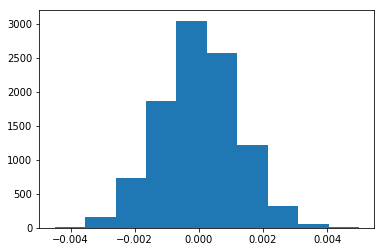

In [28]:
# plot sampling distribution
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# observed difference

control = df2.query('group == "control"&converted==1')
treatment = df2.query('group == "treatment"&converted==1')
u=control.shape[0]/df2[df2['group']== "control"].shape[0]
t=treatment.shape[0]/df2[df2['group'] == "treatment"].shape[0]
obs_diff=(t-u)
obs_diff

-0.0015790565976871451

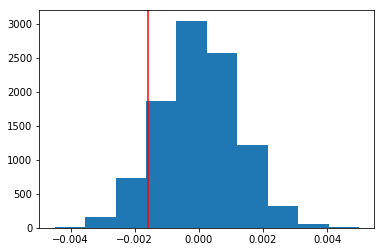

In [30]:
# plot line for observed statistic
plt.hist(p_diffs);
plt.axvline(x=obs_diff,color='r')

In [31]:
# the proportion of p_diffs greater than the observe difference

(p_diffs>obs_diff).mean()

0.90280000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

0.89 is the proportion of the p_diffs are greater than the actual difference observed and  in scientific studies in scientific studies this value called p_value and this value means that we cannot reject the null hypothesis

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old =len(df2.query('landing_page == "new_page" & converted == 1')) 
convert_new = len(df2.query('landing_page == "old_page" & converted == 1'))
n_old = len(df2.query('landing_page == "old_page"'))
n_new =len(df2.query('landing_page == "new_page" '))


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],value=None, alternative='larger', prop_var=False)


In [34]:
z_score

-1.261011806479853

In [35]:
p_value

0.89634770327583912

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score and p-value mean dose not  reject the null hypothesisThe Null is the old page converted rate is equal to or greater than the new page converted rate. The p value is 0.10 and exceeds the significance level of 0.05

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
#make dummy columns 
df2[['control','treatment']]= pd.get_dummies(df2['group'])


In [37]:
df2.head()

,user_id,timestamp,group,landing_page,converted,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [38]:
#drop columns 
df2=df2.drop('control',axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


In [39]:
#make copy of column
s=df2['treatment'].copy()

In [40]:
#add column to data frame and rename it 
df2['ab_page']=s

In [41]:
df2.head()

,user_id,timestamp,group,landing_page,converted,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,0


In [42]:
df2=df2.drop('treatment',axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [43]:
from scipy import stats
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)


In [44]:

df2['intercept']=1

In [45]:
### Fit Your Linear Model And Obtain the Results
lm=sm.Logit(df2['converted'],df2[['ab_page','intercept']])
result=lm.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:               8.085e-06
Time:                        14:55:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

the p-value associated with **ab_page** is 0.19 and its higher than 0.05 and that mean the p_value here is not significant

the p_value diffrent from part two to part three becouse we use intercept	for regression and we did not use it in A/b tisting 

For part 2 Alternative hypothesis:convesion rate for old page is less than conversion rate of new page  that is one taile test .For part3 Alternative hypothesis:e convesion rate for old page is different to the conversion rate for  the new_page that is two tail test . 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

its  nice idea to consider other factors that might influence whether or not an individual converts

the summary  will be more complex

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [47]:
#import data frame 
df_con=pd.read_csv('countries.csv')
df_con.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [48]:
df_new = df_con.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [49]:
#show unique values 
df_new['country'].unique()


array(['US', 'UK', 'CA'], dtype=object)

In [50]:
df_new[['CA','UK', 'US']]= pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1


In [51]:

#mean conversion rate by CA
x=df_new.query('ab_page==1&CA==1')
b=df_new[df_new['CA']==1]
con_CA=x.shape[0]/b.shape[0]
con_CA

0.5035519691013174

In [52]:
#mean conversion rate by UK
x=df_new.query('ab_page==1&UK==1')
b=df_new[df_new['UK']==1]
con_UK=x.shape[0]/b.shape[0]
con_UK

0.49824745397841746

In [53]:

#mean conversion rate by US
x=df_new.query('ab_page==1&US==1')
b=df_new[df_new['US']==1]
con_US=x.shape[0]/b.shape[0]
con_US

0.5004616442392692

In [54]:
#mean of conversion rate
df_new['ab_page']. mean()

0.5000636646764286

In [55]:
#mean of conversion rate for new page
m=df_new.query('landing_page=="new_page"&converted==1')
n=df_new.query('landing_page=="new_page"')
con_new_page=m.shape[0]/n.shape[0]
con_new_page

0.11880724790277405

In [56]:
#mean of conversion rate for old_page
m=df_new.query('landing_page=="old_page"&converted==1')
n=df_new.query('landing_page=="old_page"')
con_old_page=m.shape[0]/n.shape[0]
con_old_page

0.1203863045004612

In [57]:
df_new['intercept'] = 1

lm = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','US']])
results = lm.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:               2.324e-05
Time:                        14:55:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

The country does not appear to have any effect on the conversion rate

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [58]:
#mean of conversion rate for new page  and CA
m=df_new.query('landing_page=="new_page"&converted==1&CA==1')
n=df_new.query('landing_page=="new_page"&CA==1')
con_new_CA=m.shape[0]/n.shape[0]
con_new_CA

0.11190247911245035

In [59]:
#mean of conversion rate for old page and CA
m=df_new.query('landing_page=="old_page"&converted==1&CA==1')
n=df_new.query('landing_page=="old_page"&CA==1')
con_old_CA=m.shape[0]/n.shape[0]
con_old_CA

0.11878299527646569

In [60]:
#mean of conversion rate for new page  and UK
m=df_new.query('landing_page=="new_page"&converted==1&UK==1')
n=df_new.query('landing_page=="new_page"&UK==1')
con_new_UK=m.shape[0]/n.shape[0]
con_new_UK

0.1211709965102753

In [61]:
#mean of conversion rate for old_page and UK
m=df_new.query('landing_page=="old_page"&converted==1&UK==1')
n=df_new.query('landing_page=="old_page"&UK==1')
con_old_UK=m.shape[0]/n.shape[0]
con_old_UK

0.12002200220022002

In [62]:
#mean of conversion rate for new page  and US
m=df_new.query('landing_page=="new_page"&converted==1&US==1')
n=df_new.query('landing_page=="new_page"&US==1')
con_new_US=m.shape[0]/n.shape[0]
con_new_US


0.11846443711728685

In [63]:
#mean of conversion rate for old_page and US
m=df_new.query('landing_page=="old_page"&converted==1&US==1')
n=df_new.query('landing_page=="old_page"&US==1')
con_new_US=m.shape[0]/n.shape[0]
con_new_US


0.12062998938220143

In [64]:
df_new['int_US_ab_page'] = df_new['US'] *df_new['ab_page']
df_new['int_UK_ab_page'] = df_new['UK'] *df_new['ab_page']

df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,int_US_ab_page,int_UK_ab_page
user_id,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1,1,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1,1,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1,0,0,1,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1,1,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1,1,0


In [65]:
df_new['intercept'] = 1

lm = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','US','int_US_ab_page','UK','int_UK_ab_page']])
results = lm.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:               3.483e-05
Time:                        14:55:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1918
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page           -0.0674      0.052     -1.297      0.195      -0.169       0.034
US                 0.0175      0.038      0.465      0.642      -0.056       0.091
int_US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK                 0.0118      0.040      0.296      0.767      -0.066       0.090
int_UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==================================================================================
"""

Summary for  regression

>The p value for both interaction terms is higher than 0.05.

Conclusions


>There is no clear proof that the conversion rate is affected by countries (the United States, Canada and the United Kingdom)

>There is no evidence that the new website raises the conversion rate against the old one. 

In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0